<a href="https://colab.research.google.com/github/Sumandhal01/netflix-movies-and-tv-shows-clustering/blob/main/Netflix_Movies_and_TV_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised Clustering and Recommendation System
##### **Contribution**    - Individual


# **GitHub Link -**

https://github.com/Sumandhal01/netflix-movies-and-tv-shows-clustering

# **Project Summary -**

The goal of this project is to analyze the Netflix catalog of movies and TV shows, which was sourced from the third-party search engine Flixable, and group them into relevant clusters. This will aid in enhancing the user experience and prevent subscriber churn for the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers as of 2022-Q2. The dataset, which includes movies and TV shows as of 2019, will be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.

* There were approximately 7787 records and 11 attributes in the dataset.

* We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

* Using the following attributes to create a cluster: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

* The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA).

* Using a variety of methods, including the elbow method, silhouette score, dendrogram, and others, we constructed two distinct types of clusters with the K-Means Clustering and Agglomerative Hierarchical clustering algorithms, respectively, and determined the optimal number of clusters.

* The similarity matrix generated by applying cosine similarity was used to construct a content-based recommender system. The user will receive ten recommendations from this recommender system based on the type of show they watched.

# **Problem Statement**


Netflix is a streaming service that offers a wide variety of television shows and movies for viewers to watch at their convenience. With a monthly subscription, users have access to a vast library of content, including original series and films produced by Netflix. The platform also allows users to create multiple profiles, making it easy for family members or roommates to have their own personalized viewing experience. Additionally, Netflix allows users to download content to watch offline, making it a great option for those who travel frequently or have limited internet access. Overall, Netflix is a convenient and cost-effective way to access a wide variety of entertainment.

As of 2022-Q2, more than 220 million people had signed up for Netflix's online streaming service, making it the largest OTT provider worldwide. To improve the user experience and prevent subscriber churn, they must efficiently cluster the shows hosted on their platform.

By creating clusters, we will be able to comprehend the shows that are alike and different from one another. These clusters can be used to provide customers with individualized show recommendations based on their preferences.

This project aims to classify and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are different.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin!***

## ***1. Know your Data***

### **Importing required libraries**

In [3]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# library for performing hypothetical testing
!pip install scipy
import scipy.stats as stats
from scipy.stats import pearsonr


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Loading Dataset**

In [4]:
# load the NETFLIX MOVIES AND TV SHOWS CLUSTERING data set from the drive
netflixdf = pd.read_csv('https://drive.google.com/uc?export=download&id=1uCzKRPPE7bSELDZ19com-yXubvp15mfp')

### **Dataset First View**

In [5]:
# Check the dataset
netflixdf

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

In [6]:
# top 6 rows
netflixdf.head(6)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   
5       July 1, 2017          2016  TV-MA   1 Season   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...

In [5]:
# last 6 rows
netflixdf.tail(6)

show_id     type                                    title      director  \
7781   s7782    Movie                                     Zoom  Peter Hewitt   
7782   s7783    Movie                                     Zozo   Josef Fares   
7783   s7784    Movie                                   Zubaan   Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan           NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts           NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS      Sam Dunn   

                                                   cast  \
7781  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7781                                      United States    January 11, 2020   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7781          2006     PG    88 min   
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7781                 Children & Family Movies, Comedies   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7781  Dragged from civilian life, a former superhero...  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### **Dataset Rows and Columns count**


In [7]:
# Dataset Rows & Columns
netflixdf.shape

(7787, 12)

In [8]:
# list of columns
netflixdf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### **Dataset Information**

In [9]:
# Dataset Info
netflixdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate values

In [10]:
# Duplicate Value Count
netflixdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Length: 7787, dtype: bool

In [11]:
# Duplicate Value Count
netflixdf[netflixdf.duplicated()].shape

(0, 12)

We found that there were no duplicate entries in the above data.

#### Missing Values/Null Values

In [12]:
# Missing/Null values
netflixdf.isna()

show_id   type  title  director   cast  country  date_added  \
0       False  False  False      True  False    False       False   
1       False  False  False     False  False    False       False   
2       False  False  False     False  False    False       False   
3       False  False  False     False  False    False       False   
4       False  False  False     False  False    False       False   
...       ...    ...    ...       ...    ...      ...         ...   
7782    False  False  False     False  False    False       False   
7783    False  False  False     False  False    False       False   
7784    False  False  False      True  False     True       False   
7785    False  False  False      True  False    False       False   
7786    False  False  False     False   True    False       False   

      release_year  rating  duration  listed_in  description  
0            False   False     False      False        False  
1            False   False     False      False        False  
2            False   False     False      False        False  
3            False   False     False      False        False  
4            False   False     False      False        False  
...            ...     ...       ...        ...          ...  
7782         False   False     False      False        False  
7783         False   False     False      False        False  
7784         False   False     False      False        False  
7785         False   False     False      False        False  
7786         False   False     False      False        False  

[7787 rows x 12 columns]

In [13]:
# Missing/Null values count
netflixdf.isnull().sum().sort_values(ascending=False)[:8]


director      2389
cast           718
country        507
date_added      10
rating           7
show_id          0
type             0
title            0
dtype: int64

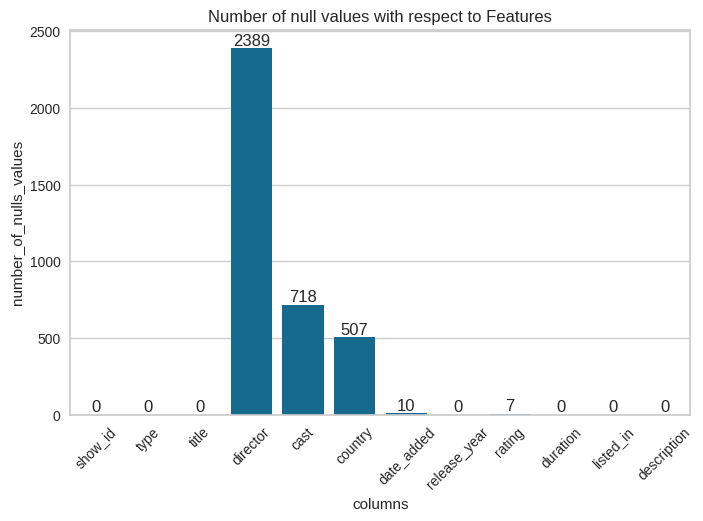

In [14]:
# Ploting number of null values with its variable
null_df=pd.DataFrame({'columns':netflixdf.columns,'number_of_nulls_values':netflixdf.isna().sum()})
null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)
plt.figure(figsize=(8,5))
ax=sns.barplot(x='columns', y='number_of_nulls_values', data=null_df)
ax.bar_label(ax.containers[0])
plt.title('Number of null values with respect to Features')
plt.xticks(rotation= 45)
plt.show()

In [15]:
# create a copy of the dataset
netflix = netflixdf.copy()

### What did you know about your dataset?

The given dataset is from the online streaming industry; our task is to examine the dataset, build the clustering methods and content based recommendation system.

Clustering is a technique used in machine learning and data mining to group similar data points together. A clustering algorithm is a method or technique used to identify clusters within a dataset. These clusters represent natural groupings of the data, and the goal of clustering is to discover these groupings without any prior knowledge of the groupings.

* There are 7787 rows and 12 columns in the dataset. In the director, cast, country, date_added, and rating columns, there are missing values. The dataset does not contain any duplicate values.

* Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values. Additionally, due to the small size of the data, we do not want to lose any data, so after analyzing each column, we simply impute numeric values using an empty string in the following procedure.

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
# Dataset Describe    (used to get statistics of numerical columns)
netflix.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

###  Variables Description

* **show_id :** Unique ID for every Movie/Show
* **type :** Identifier - Movie/Show
* **title :** Title of the Movie/Show
* **director :** Director of the Movie/Show
* **cast :** Actors involved in the Movie/Show
* **country :** Country where the Movie/Show was produced
* **date_added :** Date it was added on Netflix
* **release_year :** Actual Release year of the Movie/Show
* **rating :** TV Rating of the Movie/Show
* **duration :** Total Duration - in minutes or number of seasons
* **listed_in :** Genre
* **description :** The Summary description

### Unique Values

In [18]:
# Check Unique Values for each variable.
for i in netflix.columns.tolist():
  print("No. of unique values in",i,"is",netflix[i].nunique())

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


In [19]:
netflix['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [20]:
netflix['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

## ***3. Data Wrangling***

### Data Wrangling Code

Handling Missing Data

In [21]:
# Missing/Null values count
netflix.isnull().sum().sort_values(ascending=False)[:8]


director      2389
cast           718
country        507
date_added      10
rating           7
show_id          0
type             0
title            0
dtype: int64

In [22]:
# Filling null values of features director, cast and country
netflix[['director','cast','country']] = netflix[['director','cast','country']].fillna(' ')
# Dropping null values from date_added and rating columns
netflix.dropna(axis=0, inplace=True)

In [23]:
# Missing/Null values count
netflix.isnull().sum().sort_values(ascending=False)[:8]


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
dtype: int64

type casting the columns to appropriate datatypes and arranging column

In [24]:
# change date_added from object datatype to Date datatype
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['date_added']

# Converting the data type of release_year to the appropriate data type
netflix.release_year = netflix.release_year.astype('int64')
netflix['release_year']

0       2020
1       2016
2       2011
3       2009
4       2008
        ... 
7782    2005
7783    2015
7784    2019
7785    2019
7786    2019
Name: release_year, Length: 7770, dtype: int64

In [25]:
## Adding new features based on feature date_added
netflix['year']=netflix['date_added'].dt.year
netflix['month']=netflix['date_added'].dt.month
netflix['day_added']=netflix['date_added'].dt.day

# Delete feature date_added
netflix=netflix.drop('date_added', axis='columns')
netflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year  month  day_added  
0  In a future where the elite inhabit an island ...  2020      8         14  
1  After a devastating earthquake hits Mexico Cit...  2016     12         23  
2  When an army recruit is found dead, his fellow...  2018     12         20  
3  In a postapocalyptic world, rag-doll robots hi...  2017     11         16  
4  A brilliant group of students become card-coun...  2020      1          1

In [26]:
netflix.day_added = netflix.day_added.astype('int64')

changeing column names for better understanding

In [27]:
# changing name of variable listed_in to genre
netflix.rename = netflix.rename(columns={'listed_in':'genres'}, inplace=True)

In [28]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   release_year  7770 non-null   int64 
 7   rating        7770 non-null   object
 8   duration      7770 non-null   object
 9   genres        7770 non-null   object
 10  description   7770 non-null   object
 11  year          7770 non-null   int64 
 12  month         7770 non-null   int64 
 13  day_added     7770 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 910.5+ KB


Handling Outliers

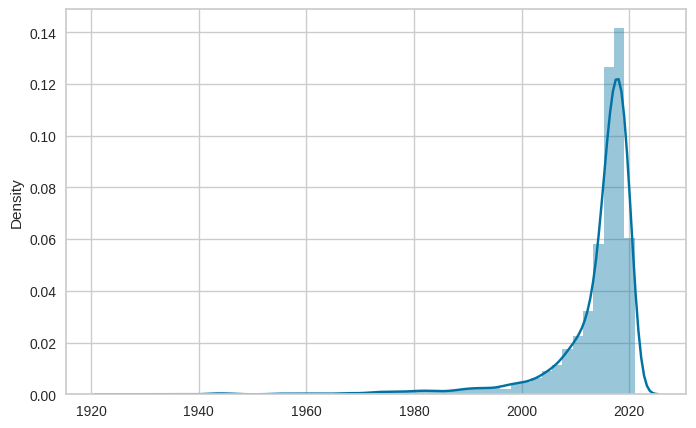

In [29]:
# plotting graph fro outliers
plt.figure(figsize=(8,5))
sns.distplot(x=netflix['release_year'])
plt.show()


In [30]:
# Using Inter Quartile range in skew symmetric curve for removing outliers
cat_var=[var for var in netflix.describe(include='object')]
num=[var for var in netflix.columns if var not in cat_var]
# Capping dataset
for i in num:
    # Findling IQR
    Q1=netflix[i].quantile(0.25)
    Q3=netflix[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining upper and lower limit
    lower_limit =netflix[i].quantile(0.25)-1.5*IQR
    upper_limit =netflix[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    netflix.loc[(netflix[i] > upper_limit),i] = upper_limit
    netflix.loc[(netflix[i] < lower_limit),i] = lower_limit

### What all manipulations have been done and insights found?

*   Find the duplicate values.
*   As there are no duplicate values so it is not required to be handled.
*   Find all the missing values in the dataset. Four columns have missing values that are director,cast,country,date_added .

*   Convert some columns to appropriate datatypes. Convert the datatype of column date_added and release_year.
* date_added is from object to datetime and release_year is from float64 to int64.
*   Rename some column for better understanding.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart 1**

In [31]:
# number of values of different categories in 'type'
netflix['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

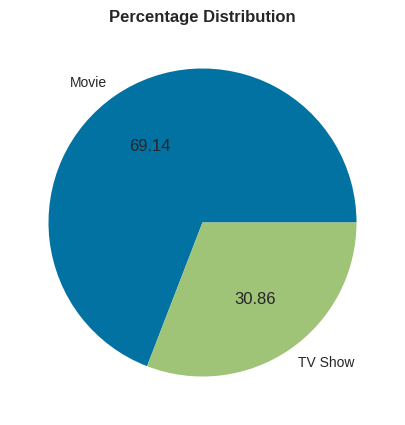

In [32]:
# plot piechart for the percentage distribution
plt.figure(figsize = (8,5))
type_of_content =netflix.groupby(by='type').size()
plt.pie(type_of_content,labels=['Movie','TV Show'],autopct='%.2f')
plt.title('Percentage Distribution', weight="bold")
plt.show()

 Movies has more number of counts than TV Shows that is 31% of the data are from TV shows, while 69% of the data are from movies.

#### **Chart 2**

In [33]:
netflix.director.nunique()

4048

In [34]:
# num of movies directed by director
netflix[netflix['type']=='TV Show']['director'].value_counts().sum()


2398

In [35]:
# Numb of TV shows directed by directors
netflix[netflix['type']=='Movie']['director'].value_counts().sum()


5372

In [36]:

# tv_shows
tv_shows_df= pd.DataFrame(netflix[netflix['type']=='TV Show'])

# movies
movies_df= pd.DataFrame(netflix[netflix['type']=='Movie'])

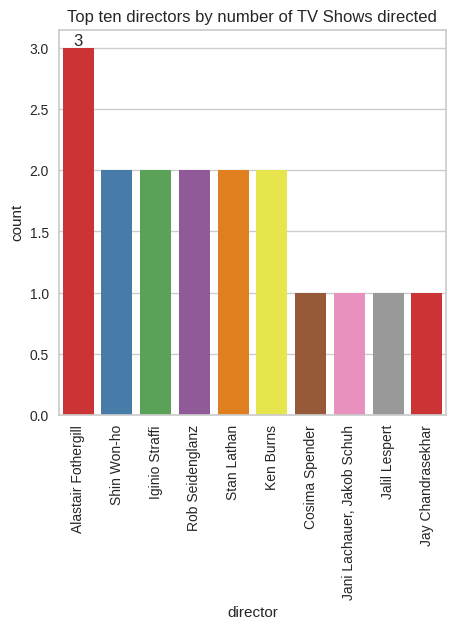

In [37]:
## The directors of the majority of TV Shows

# Removing observations where the director is unavailable
tv_shows_df=tv_shows_df[tv_shows_df['director'] != 'Director Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 directors of TV Shows
ax=sns.countplot(x=tv_shows_df['director'], order=tv_shows_df.director.value_counts().index[1:11],palette='Set1')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten directors by number of TV Shows directed')

# Displaying plot
plt.show()

The three shows directed by Alastair Fothergill are the highest on the data list.

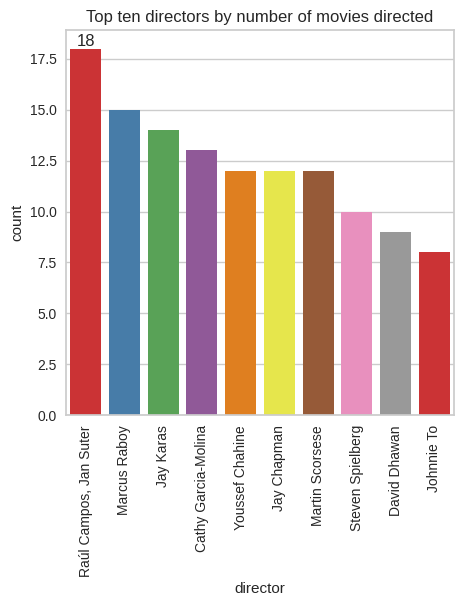

In [38]:
## The directors of the majority of movies

# Removing observations where the director is unavailable
movies_df=movies_df[movies_df['director'] != 'Director Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 directors of movies
ax=sns.countplot(x=movies_df['director'], order=movies_df.director.value_counts().index[1:11], palette='Set1')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten directors by number of movies directed')

# Displaying plot
plt.show()

Both, Jan Suter and Raul Campos have directed 18 films, more than anyone else in the dataset.

#### **Chart 3**

In [39]:
# number of unique values
netflix['title'].nunique()

7770

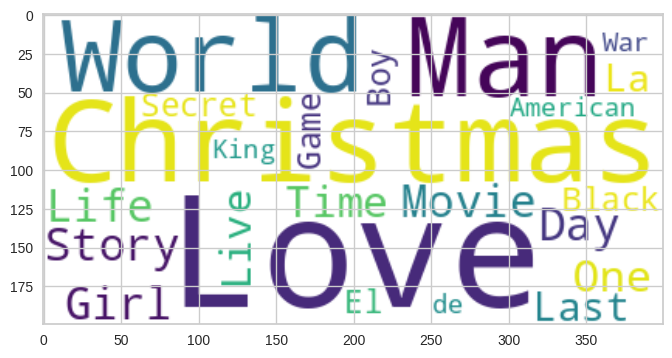

In [40]:
# text documents
text = " ".join(word for word in netflix['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

 Words like 'Love', 'Christmas', 'Man', 'World', 'Life', 'Girl', and 'Story' are frequently used in the movie title column.

#### **Chart 4**

In [41]:
netflix['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                     
Name: cast, Length: 7770, dtype: object

In [42]:
# seperating actors from cast column
cast = netflix['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

                    718
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     30
Om Puri              30
                   ... 
Mylene Dizon          1
Lorenz Martinez       1
Art Acuña             1
Archie Alemania       1
Rachel Khoo           1
Length: 32837, dtype: int64

In [43]:
# tv shows actors
netflix[netflix['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts()

                    292
Takahiro Sakurai     22
Yuki Kaji            17
Daisuke Ono          16
Ai Kayano            15
                   ... 
Phil Burke            1
Robin McLeavy         1
Tom Noonan            1
Lukas Engel           1
Rachel Khoo           1
Length: 13526, dtype: int64

In [44]:
# Movie actors
netflix[netflix['type']=='Movie']['cast'].str.split(', ',expand=True).stack().value_counts()

                    426
Anupam Kher          41
Shah Rukh Khan       35
Om Puri              30
Naseeruddin Shah     30
                   ... 
Chester Rushing       1
Anthony Lister        1
Belle Shouse          1
Douglas Tait          1
Nasty C               1
Length: 23043, dtype: int64

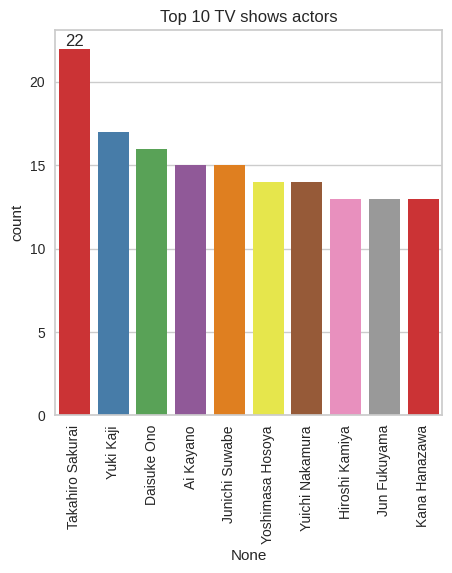

In [45]:
# seperating TV shows actor from cast column
top_TVshows_actor = netflix[netflix['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 directors of movies
ax=sns.countplot(x=top_TVshows_actor, order=top_TVshows_actor.value_counts().index[1:11], palette='Set1')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top 10 TV shows actors')

# Displaying plot
plt.show()

 In the shows, Takahiro Sakurai, Yuki Kaji, and Daisuke Ono played the most number of roles.

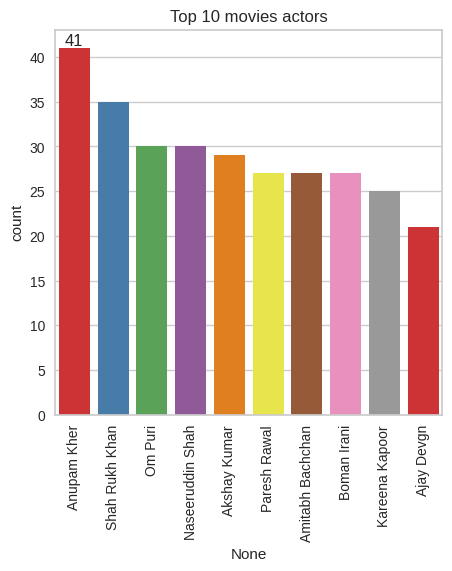

In [46]:
# seperating movie actor from cast column
top_movies_actor = netflix[netflix['type']=='Movie']['cast'].str.split(', ', expand=True).stack()

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 directors of movies
ax=sns.countplot(x=top_movies_actor, order=top_movies_actor.value_counts().index[1:11], palette='Set1')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top 10 movies actors')

# Displaying plot
plt.show()

The majority of the roles in the movies are played by Anupam Kher, Shahrukh Khan, and Om Puri.


#### **Chart 5**

In [47]:
# number of unique values
netflix.rating.nunique()

14

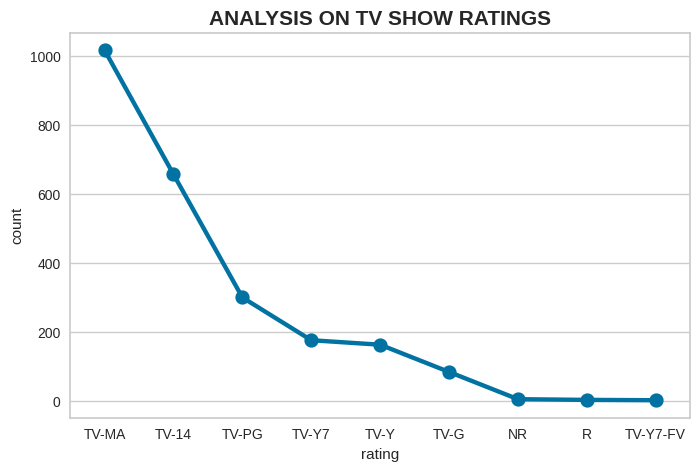

In [48]:
#Analysis on rating based on overall TV show rating system
tv_ratings = tv_shows_df.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('ANALYSIS ON TV SHOW RATINGS', fontsize=15, fontweight='bold')
plt.show()

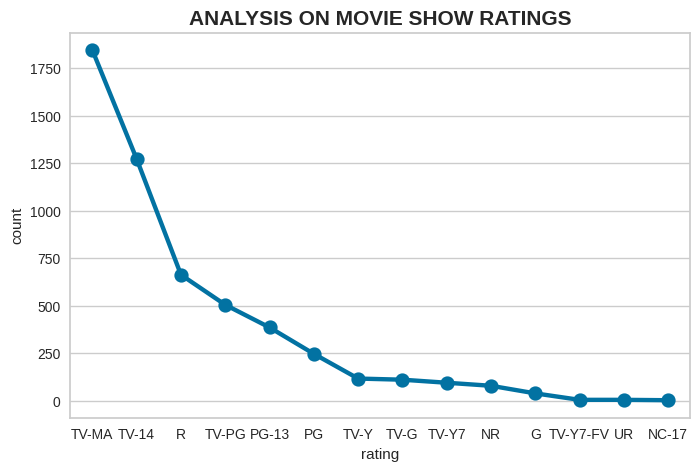

In [49]:
#Analysis on rating based on overall movie show rating system
movies_ratings = movies_df.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=movies_ratings)
plt.title('ANALYSIS ON MOVIE SHOW RATINGS', fontsize=15, fontweight='bold')
plt.show()

* The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."
* When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.

#### **Chart 6**

In [50]:
# number of unique values
netflix['country'].nunique()

682

<Figure size 500x500 with 0 Axes>

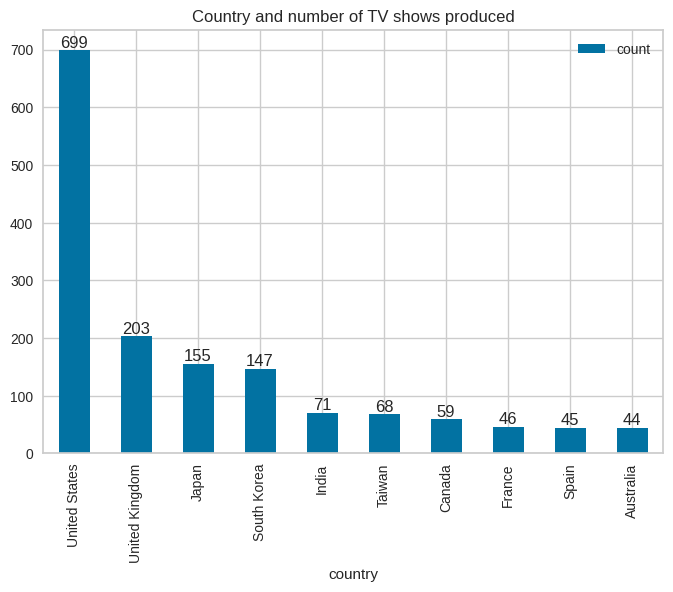

In [51]:
## The country where the majority of TV shows are produced

# Creating a dataframe for countries where TV shows are produced and counting them
tv_show_country=pd.DataFrame(tv_shows_df.groupby(by='country').size()).sort_values(by= 0, ascending = False)
tv_show_country.rename(columns={0:'count'}, inplace=True)

# Removing observations where the country is unavailable
tv_show_country=tv_show_country[tv_show_country.index != ' ']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting bar graph for top most 10 country
ax=tv_show_country.head(10).plot(kind='bar')

# Assigning labels to the graph
plt.title('Country and number of TV shows produced')
ax.bar_label(ax.containers[0])

# Displaying plot
plt.show()

 In the UK, Japan, and South Korea there are a greater number of TV shows than movies.

<Figure size 500x500 with 0 Axes>

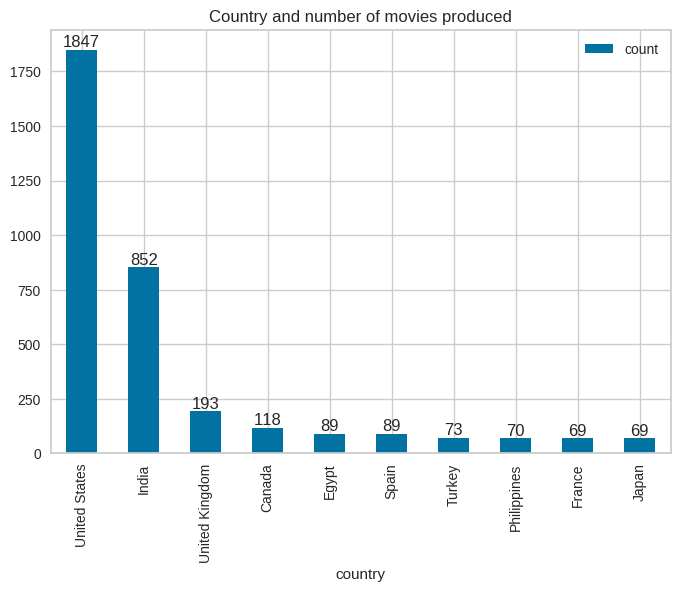

In [52]:
## The country where the majority of movies are produced

# Creating a dataframe for countries where movie are produced and counting them
movie_country=pd.DataFrame(movies_df.groupby(by='country').size()).sort_values(by= 0, ascending = False)
movie_country.rename(columns={0:'count'}, inplace=True)

# Removing observations where the country is unavailable
movie_country=movie_country[movie_country.index != ' ']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting bar graph for top most 10 country
ax=movie_country.head(10).plot(kind='bar')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.title('Country and number of movies produced')

# Displaying plot
plt.show()

 In India and United State, a greater number of movies are present compared to TV shows.




#### **Chart 7**

In [53]:
# number of unique values
netflix['release_year'].nunique()

17

In [54]:
print(f'Oldest release year : {netflix.release_year.min()}')
print(f'Latest release year : {netflix.release_year.max()}')

Oldest release year : 2005.5
Latest release year : 2021.0


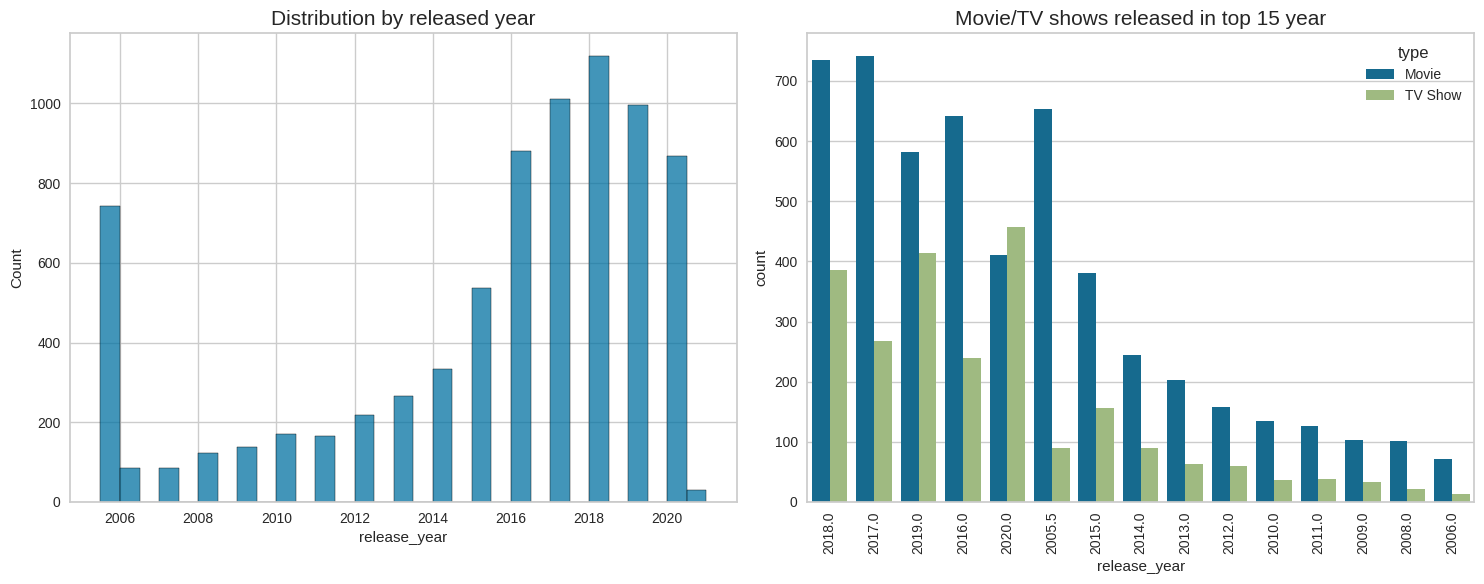

In [55]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(netflix['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=netflix, order=netflix['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

* Netflix starts releasing more Movies/TV shows in recent years compared to old ones.
* Most Movies and TV shows are available on Netflix between 2015 and 2020, and the highest are in 2018.

#### **Chart 8**

In [56]:
netflix['genres'].head()

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: genres, dtype: object

Because this column is a genre column, in order to count the genres, we must separate them.

In [56]:
# seperating genre from listed_in columns for analysis purpose
genres = netflix['genres'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

genre  count
0    International Movies   2437
1                  Dramas   2105
2                Comedies   1471
3  International TV Shows   1197
4           Documentaries    786

In [57]:
# number of genres present in dataset
len(genres)

42

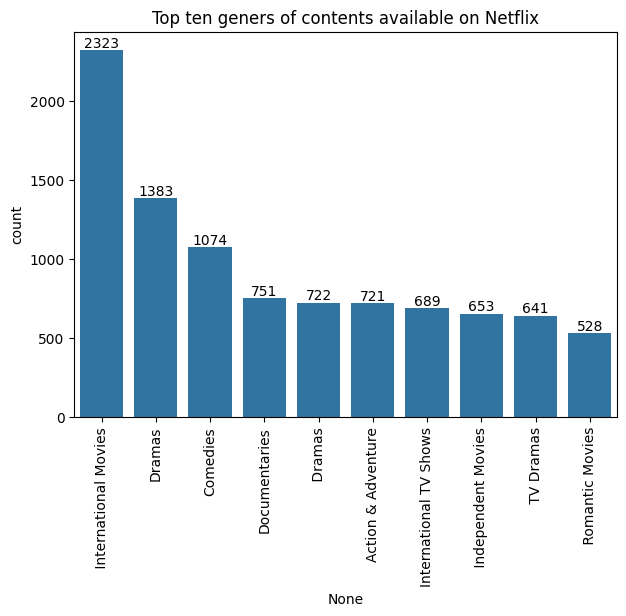

In [58]:
## Netflix's Most Popular Content Genres

# Creating a dataframe for geners
genres_df=netflix.genres.str.split(',', expand=True).unstack()

# Defining size of plot
plt.figure(figsize=(7,5))

# Plotting count plot graph for top most 10 geners of content available on Netflix
ax=sns.countplot(x=genres_df, order=genres_df.value_counts().index[:10])

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten geners of contents available on Netflix')

# Displaying plot
plt.show()

International Movies, Dramas, and Comedies make up the majority of the genres.


#### **Chart 9**

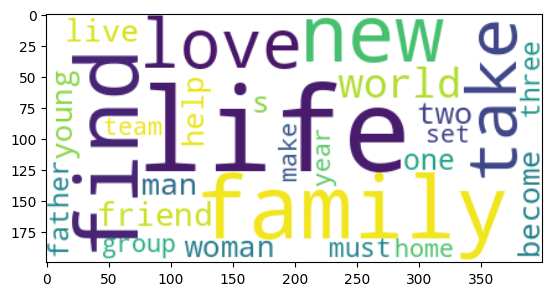

In [59]:
# text documents
text = " ".join(word for word in netflix['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

The most frequently used words in the description column are "family," "find," "life," "love," "new world," and "friend."

#### **Chart 10 - Correlation Heatmap**

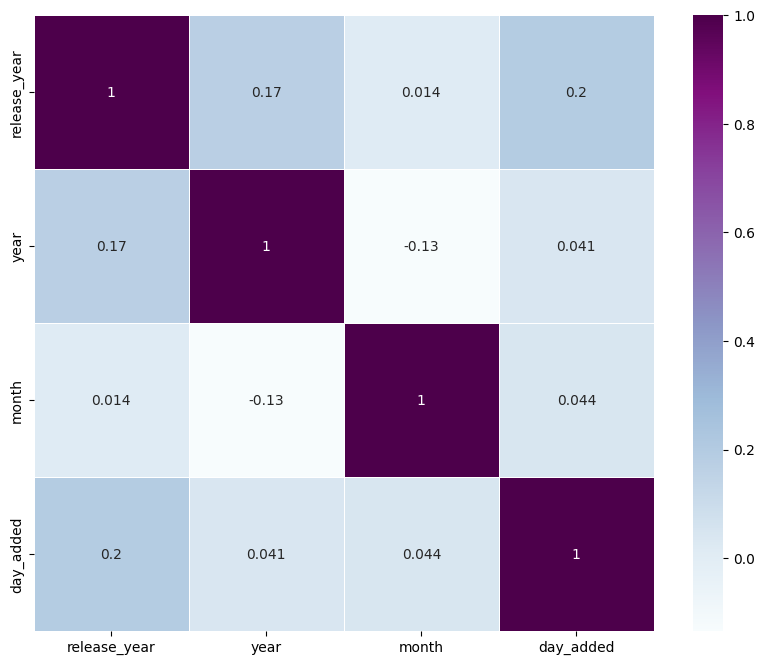

In [60]:

# Examining the heatmap and correlation matrix to determine the relationship between the variables
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(netflix.corr(),ax = ax, annot=True, cmap='BuPu', linewidths=0.5)
plt.show()

We see that the movie or TV show release year and day of the month on movies or TV shows added to Netflix are slightly correlated with each other.

#### **Chart 11 - Pair plot**

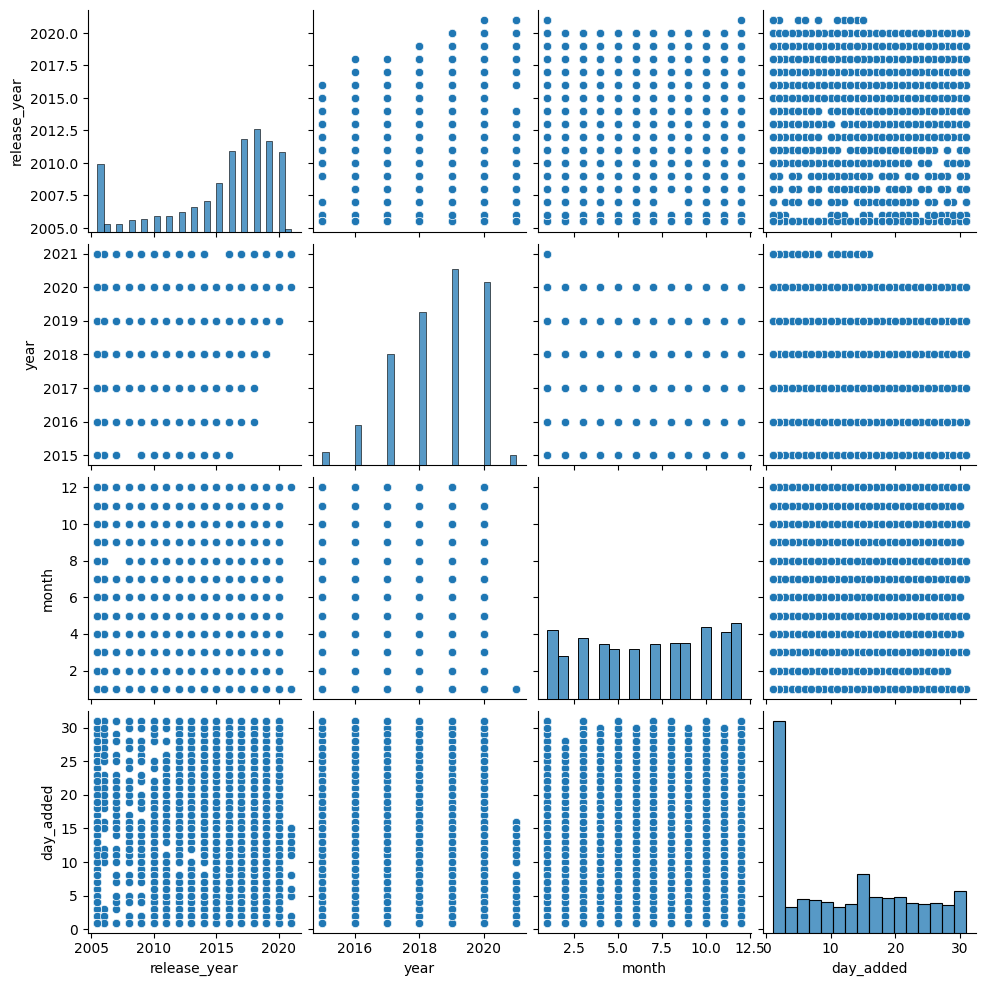

In [61]:
# Pair Plot visualization code
sns.pairplot(netflix, palette="husl")
plt.show()


*   Based on the plot of release_year and year_added, we can conclude that Netflix is increasingly adding and releasing movies and TV shows over time.
*   We can conclude from plot release_year and month_added that Netflix releases movies and TV shows throughout the all months of the year.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [62]:
# Hypothesis 1:
# There is no significant difference in the number of movies and TV shows released each year.

# Perform hypothesis testing:
# Calculate the mean number of movies and TV shows released each year.
mean_movies = netflix[netflix['type'] == 'Movie']['release_year'].mean()
mean_tv_shows = netflix[netflix['type'] == 'TV Show']['release_year'].mean()

# Calculate the standard deviation of the number of movies and TV shows released each year.
std_movies = netflix[netflix['type'] == 'Movie']['release_year'].std()
std_tv_shows = netflix[netflix['type'] == 'TV Show']['release_year'].std()

# Calculate the t-statistic for the hypothesis test.
t_statistic = (mean_movies - mean_tv_shows) / np.sqrt(std_movies**2 + std_tv_shows**2)

# Calculate the degrees of freedom for the hypothesis test.
df = len(netflix) - 2

# Calculate the p-value for the hypothesis test.
p_value = stats.t.cdf(t_statistic, df=df)

# Print the hypothesis test results.
print("Hypothesis 1:")
print("There is no significant difference in the number of movies and TV shows released each year.")
print("Mean number of movies released each year:", mean_movies)
print("Mean number of TV shows released each year:", mean_tv_shows)
print("Standard deviation of the number of movies released each year:", std_movies)
print("Standard deviation of the number of TV shows released each year:", std_tv_shows)
print("t-statistic:", t_statistic)
print("Degrees of freedom:", df)
print("p-value:", p_value)
print("Conclusion:", end=" ")
if p_value < 0.05:
  print("The hypothesis is rejected.")
else:
  print("The hypothesis is not rejected.")

Hypothesis 1:
There is no significant difference in the number of movies and TV shows released each year.
Mean number of movies released each year: 2014.5735294117646
Mean number of TV shows released each year: 2016.597789824854
Standard deviation of the number of movies released each year: 4.633434222532571
Standard deviation of the number of TV shows released each year: 3.654984896791587
t-statistic: -0.3430081490301722
Degrees of freedom: 7768
p-value: 0.3658008056540204
Conclusion: The hypothesis is not rejected.


##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [63]:

# Hypothesis 2:
# There is a significant difference in the number of movies and TV shows released in the United States and other countries.

# Perform hypothesis testing:
# Calculate the mean number of movies and TV shows released in the United States and other countries.
mean_us_movies = netflix[netflix['country'] == 'United States']['release_year'].mean()
mean_other_countries_movies = netflix[netflix['country'] != 'United States']['release_year'].mean()

mean_us_tv_shows = netflix[netflix['country'] == 'United States']['release_year'].mean()
mean_other_countries_tv_shows = netflix[netflix['country'] != 'United States']['release_year'].mean()

# Calculate the standard deviation of the number of movies and TV shows released in the United States and other countries.
std_us_movies = netflix[netflix['country'] == 'United States']['release_year'].std()
std_other_countries_movies = netflix[netflix['country'] != 'United States']['release_year'].std()

std_us_tv_shows = netflix[netflix['country'] == 'United States']['release_year'].std()
std_other_countries_tv_shows = netflix[netflix['country'] != 'United States']['release_year'].std()

# Calculate the t-statistic for the hypothesis test.
t_statistic_movies = (mean_us_movies - mean_other_countries_movies) / np.sqrt(std_us_movies**2 + std_other_countries_movies**2)
t_statistic_tv_shows = (mean_us_tv_shows - mean_other_countries_tv_shows) / np.sqrt(std_us_tv_shows**2 + std_other_countries_tv_shows**2)

# Calculate the degrees of freedom for the hypothesis test.
df_movies = len(netflix) - 2
df_tv_shows = len(netflix) - 2

# Calculate the p-value for the hypothesis test.
p_value_movies = stats.t.cdf(t_statistic_movies, df=df_movies)
p_value_tv_shows = stats.t.cdf(t_statistic_tv_shows, df=df_tv_shows)

# Print the hypothesis test results.
print("\nHypothesis 2:")
print("There is a significant difference in the number of movies and TV shows released in the United States and other countries.")
print("Mean number of movies released in the United States:", mean_us_movies)
print("Mean number of movies released in other countries:", mean_other_countries_movies)
print("Standard deviation of the number of movies released in the United States:", std_us_movies)
print("Standard deviation of the number of movies released in other countries:", std_other_countries_movies)
print("t-statistic:", t_statistic_movies)
print("Degrees of freedom:", df_movies)
print("p-value:", p_value_movies)
print("Conclusion:", end=" ")
if p_value_movies < 0.05:
  print("The hypothesis is rejected.")
else:
  print("The hypothesis is not rejected.")
print("Mean number of TV shows released in the United States:", mean_us_tv_shows)
print("Mean number of TV shows released in other countries:", mean_other_countries_tv_shows)
print("Standard deviation of the number of TV shows released in the United States:", std_us_tv_shows)
print("Standard deviation of the number of TV shows released in other countries:", std_other_countries_tv_shows)
print("t-statistic:", t_statistic_tv_shows)
print("Degrees of freedom:", df_tv_shows)
print("p-value:", p_value_tv_shows)
print("Conclusion:", end=" ")
if p_value_tv_shows < 0.05:
  print("The hypothesis is rejected.")
else:
  print("The hypothesis is not rejected.")


Hypothesis 2:
There is a significant difference in the number of movies and TV shows released in the United States and other countries.
Mean number of movies released in the United States: 2015.184603299293
Mean number of movies released in other countries: 2015.2049196018377
Standard deviation of the number of movies released in the United States: 4.717843753813366
Standard deviation of the number of movies released in other countries: 4.320048050338551
t-statistic: -0.003175939858156102
Degrees of freedom: 7768
p-value: 0.49873302621689475
Conclusion: The hypothesis is not rejected.
Mean number of TV shows released in the United States: 2015.184603299293
Mean number of TV shows released in other countries: 2015.2049196018377
Standard deviation of the number of TV shows released in the United States: 4.717843753813366
Standard deviation of the number of TV shows released in other countries: 4.320048050338551
t-statistic: -0.003175939858156102
Degrees of freedom: 7768
p-value: 0.49873

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [64]:
type_mapping = {
    'Movie': 0,
    'TV Show': 1
}

netflix['type'] = netflix['type'].map(type_mapping)

In [65]:
# Hypothesis 3:
# There is a significant correlation between the release year and the number of movies and TV shows released each year.

# Perform hypothesis testing:
correlation_coefficient, p_value = stats.pearsonr(netflix['release_year'].astype(float), netflix['type'].astype('category').cat.codes)

# Print the hypothesis test results.
print("\nHypothesis 3:")
print("There is a significant correlation between the release year and the number of movies and TV shows released each year.")
print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)
print("Conclusion:", end=" ")
if p_value < 0.05:
  print("The hypothesis is rejected.")
else:
  print("The hypothesis is not rejected.")


Hypothesis 3:
There is a significant correlation between the release year and the number of movies and TV shows released each year.
Correlation coefficient: 0.20994922554118686
p-value: 3.918143095598786e-78
Conclusion: The hypothesis is rejected.


##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

## ***6. Feature Engineering & Data Pre-processing***

### ***Textual Data Pre-processing***

In [69]:
## Creating new feature having length of words of description variable
netflix['desc_len'] = netflix['description'].apply(lambda x: len(x.split()))
netflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0        2020.0  TV-MA  4 Seasons   
1        2016.0  TV-MA     93 min   
2        2011.0      R     78 min   
3        2009.0  PG-13     80 min   
4        2008.0  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year  month  day_added  \
0  In a future where the elite inhabit an island ...  2020      8       14.0   
1  After a devastating earthquake hits Mexico Cit...  2016     12       23.0   
2  When an army recruit is found dead, his fellow...  2018     12       20.0   
3  In a postapocalyptic world, rag-doll robots hi...  2017     11       16.0   
4  A brilliant group of students become card-coun...  2020      1        1.0   

                            contractions_description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                           text_data  desc_len  
0   João Miguel, Bianca Comparato, Michel Gomes, ...        26  
1  Jorge Michel GrauDemián Bichir, Héctor Bonilla...        24  
2  Gilbert ChanTedd Chan, Stella Chung, Henley Hi...        24  
3  Shane AckerElijah Wood, John C. Reilly, Jennif...        23  
4  Robert LuketicJim Sturgess, Kevin Spacey, Kate...        22

#### **-> Selecting Attributes**

In [70]:

netflix.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country  release_year  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil        2020.0   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico        2016.0   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore        2011.0   

  rating   duration                                             genres  \
0  TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1  TV-MA     93 min                       Dramas, International Movies   
2      R     78 min                Horror Movies, International Movies   

                                         description  year  month  day_added  \
0  In a future where the elite inhabit an island ...  2020      8       14.0   
1  After a devastating earthquake hits Mexico Cit...  2016     12       23.0   
2  When an army recruit is found dead, his fellow...  2018     12       20.0   

                            contractions_description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   

                                           text_data  desc_len  
0   João Miguel, Bianca Comparato, Michel Gomes, ...        26  
1  Jorge Michel GrauDemián Bichir, Héctor Bonilla...        24  
2  Gilbert ChanTedd Chan, Stella Chung, Henley Hi...        24

We will cluster the Netflix movies and TV shows into groups based on the following textual characteristics:
* Director
* Cast
* Country
* Rating
* genres
* Description

In [67]:
# creating tags column using all text column which one is used for model building purpose.
netflix['text_data'] = netflix['director'] + netflix['cast'] + netflix['country'] + \
                     netflix['rating'] + netflix['genres'] + netflix['description']


In [68]:

# checking the first row
netflix['text_data'][0]

' João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

* We were able to successfully consolidate all of the required data into a single column.

#### **-> Expanding Contraction**

Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.

In [58]:
## Function to expands contractions from the corpus

# import contractions library
!pip install contractions
import contractions

def contraction_process(corpus):
    '''Function which expands contractions from the corpus
    Args:
    corpus (string): corpus to which function is to be applied
    Returns:
    corpus with expanded contractions
    '''
    corpus = contractions.fix(corpus)
    return corpus

# Apply the contraction_process function to each examples in description variable
netflix['contractions_description']=netflix['description'].apply(contraction_process)
netflix.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.6 MB/s eta 0:00:00


show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0        2020.0  TV-MA  4 Seasons   
1        2016.0  TV-MA     93 min   
2        2011.0      R     78 min   
3        2009.0  PG-13     80 min   
4        2008.0  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year  month  day_added  \
0  In a future where the elite inhabit an island ...  2020      8       14.0   
1  After a devastating earthquake hits Mexico Cit...  2016     12       23.0   
2  When an army recruit is found dead, his fellow...  2018     12       20.0   
3  In a postapocalyptic world, rag-doll robots hi...  2017     11       16.0   
4  A brilliant group of students become card-coun...  2020      1        1.0   

                            contractions_description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

#### **-> Removing Stop words and Lower Casing.**

In [63]:
# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [64]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)


In [71]:
# applying stopwords function.
netflix['text_data'] = netflix['text_data'].apply(stopwords)

In [72]:
# checking the first row again
netflix['text_data'][0]

'joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibraziltv-mainternational tv shows, tv dramas, tv sci-fi & fantasyin future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

* We have successfully changed the corpus to lowercase and removed all stopwords.

#### **-> Removing Punctuations**

In [73]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [74]:
# applying remove_punctuation function
netflix['text_data'] = netflix['text_data'].apply(remove_punctuation)

In [75]:
# checking the first row after the process
netflix['text_data'][0]


'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi  fantasyin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

* We have effectively eliminate all the punctuation marks from the corpus.

#### **-> Removing URLs**

In [76]:
## Function to removes URL addresses from a corpus

# Import regex library
import re

def remove_URL(corpus):
    '''
    Removes URL addresses from a corpus, if present
    Args:
        corpus (string): String to which the function is to be applied
    Returns:
        clean string without URL addresses
    '''
    return re.sub(r'https?://\S+|www\.\S+', '', corpus)

# Apply the remove_URL function to each instance in variable no_sw_pun_description
netflix['clean_description']=netflix['text_data'].apply(remove_URL)
netflix.head(6)

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

   release_year rating   duration  \
0        2020.0  TV-MA  4 Seasons   
1        2016.0  TV-MA     93 min   
2        2011.0      R     78 min   
3        2009.0  PG-13     80 min   
4        2008.0  PG-13    123 min   
5        2016.0  TV-MA   1 Season   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   

                                         description  year  month  day_added  \
0  In a future where the elite inhabit an island ...  2020      8       14.0   
1  After a devastating earthquake hits Mexico Cit...  2016     12       23.0   
2  When an army recruit is found dead, his fellow...  2018     12       20.0   
3  In a postapocalyptic world, rag-doll robots hi...  2017     11       16.0   
4  A brilliant group of students become card-coun...  2020      1        1.0   
5  A genetics professor experiments with a treatm...  2017      7        1.0   

                            contractions_description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   
5  A genetics professor experiments with a treatm...   

                                           text_data  desc_len  \
0  joão miguel bianca comparato michel gomes rodo...        26   
1  jorge michel graudemián bichir héctor bonilla ...        24   
2  gilbert chantedd chan stella chung henley hii ...        24   
3  shane ackerelijah wood john c reilly jennifer ...        23   
4  robert luketicjim sturgess kevin spacey kate b...        22   
5  serdar akarerdal beşikçioğlu yasemin allen mel...        23   

                                   clean_description  
0  joão miguel bianca comparato michel gomes rodo...  
1  jorge michel graudemián bichir héctor bonilla ...  
2  gilbert chantedd chan stella chung henley hii ...  
3  shane ackerelijah wood john c reilly jennifer ...  
4  robert luketicjim sturgess kevin spacey kate b...  
5  serdar akarerdal beşikçioğlu yasemin allen mel...

#### **-> Removing non-ASCII characters**

In [77]:
import unicodedata
# function to remove non-ascii characters
def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [78]:
# remove non-ascii characters
netflix['text_data'] = remove_non_ascii(netflix['text_data'])
netflix['text_data'][50]

'roland emmerichsteven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharifunited states south africapg13action  adventurefierce mammoth hunter dleh sets impossible journey rescue woman loves vicious warlord save people village'

#### **-> Tokenization**

Tokenization is the process of breaking text into smaller parts, known as tokens, for easier machine analysis. Tokens can be words, characters, or subwords, depending on the level of granularity and the task at hand. Tokenization helps machines understand and process human language by splitting it into manageable units.

In [79]:
# Function for tokenizing the corpus

# Import dependancy
import nltk
nltk.download('punkt')

def tokenization_fun(corpus):
    '''
    Function tokenize corpus
    Args:
        corpus (string): corpus to which the function is to be applied
    Returns:
        tokenised corpus
    '''
    return nltk.word_tokenize(corpus)

# Apply the tokenization_fun function to each instance in variable clean_description
netflix['text_data']=netflix['text_data'].apply(tokenization_fun)
netflix.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0        2020.0  TV-MA  4 Seasons   
1        2016.0  TV-MA     93 min   
2        2011.0      R     78 min   
3        2009.0  PG-13     80 min   
4        2008.0  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year  month  day_added  \
0  In a future where the elite inhabit an island ...  2020      8       14.0   
1  After a devastating earthquake hits Mexico Cit...  2016     12       23.0   
2  When an army recruit is found dead, his fellow...  2018     12       20.0   
3  In a postapocalyptic world, rag-doll robots hi...  2017     11       16.0   
4  A brilliant group of students become card-coun...  2020      1        1.0   

                            contractions_description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                           text_data  desc_len  \
0  [joao, miguel, bianca, comparato, michel, gome...        26   
1  [jorge, michel, graudemian, bichir, hector, bo...        24   
2  [gilbert, chantedd, chan, stella, chung, henle...        24   
3  [shane, ackerelijah, wood, john, c, reilly, je...        23   
4  [robert, luketicjim, sturgess, kevin, spacey, ...        22   

                                   clean_description  
0  joão miguel bianca comparato michel gomes rodo...  
1  jorge michel graudemián bichir héctor bonilla ...  
2  gilbert chantedd chan stella chung henley hii ...  
3  shane ackerelijah wood john c reilly jennifer ...  
4  robert luketicjim sturgess kevin spacey kate b...

We successfully tokenized each instance from the text data variable.

#### **-> Stemming**

Stemming is a text pre-processing technique that reduces words to their stem or root form by removing affixes, such as suffixes and prefixes. For example, the words “running”, “runs”, and “ran” are all stemmed to “run”. Stemming can help natural language processing (NLP) models to understand and process text more efficiently by reducing the vocabulary size and removing variations of the same word. However, stemming may not always produce valid words or preserve the semantic meaning of the original word.

* We will utilize **PorterStemmer** to construct a meaningful word from a word corpus.

In [80]:
## Function to perform stemming operation on corpus

# Import lirary
from nltk.stem.porter import PorterStemmer

# Create object for stemming
porter_stemmer = PorterStemmer()

# Creating function for stemming
def stemming(tokenized_text):
    '''Function which stem each word in token'''
    text = [porter_stemmer.stem(word) for word in tokenized_text]
    return text

In [81]:
# checking the first row after the process
netflix['text_data'][0]

['joao',
 'miguel',
 'bianca',
 'comparato',
 'michel',
 'gomes',
 'rodolfo',
 'valente',
 'vaneza',
 'oliveira',
 'rafael',
 'lozano',
 'viviane',
 'porto',
 'mel',
 'fronckowiak',
 'sergio',
 'mamberti',
 'zeze',
 'motta',
 'celso',
 'frateschibraziltvmainternational',
 'tv',
 'shows',
 'tv',
 'dramas',
 'tv',
 'scifi',
 'fantasyin',
 'future',
 'elite',
 'inhabit',
 'island',
 'paradise',
 'far',
 'crowded',
 'slums',
 'get',
 'one',
 'chance',
 'join',
 '3',
 'saved',
 'squalor']

* We have successfully utilized the stemming process.

#### **-> Lemmatization**

Lemmatization is a text pre-processing technique that reduces words to their base or root form, also known as the lemma. Lemmatization aims to group together different forms of a word that have the same meaning, such as “walk”, “walked”, “walking”, and “walks”. Lemmatization can help natural language processing (NLP) models to understand and analyze text more effectively by removing inflections or variations that may affect the meaning or context of a word.

In [82]:
## Function to perform lemmatization operation on corpus

# Import lirary
import nltk
from nltk.stem import WordNetLemmatizer

# Download all nltk corpuses
nltk.download('wordnet')
nltk.download('omw-1.4')

# Create object for lemmatization
lemmatizer = WordNetLemmatizer()

# Creating function for lemmatization
def lemmatization(tokenized_text):
    '''Function which lemmatize each word in token'''
    text = [lemmatizer.lemmatize(word, pos="v") for word in tokenized_text]
    return text

# Apply the lemmatization function to each instance in variable tokenized_description
netflix['text_data'] = netflix['text_data'].apply(lambda x : lemmatization(x))
netflix.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0        2020.0  TV-MA  4 Seasons   
1        2016.0  TV-MA     93 min   
2        2011.0      R     78 min   
3        2009.0  PG-13     80 min   
4        2008.0  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year  month  day_added  \
0  In a future where the elite inhabit an island ...  2020      8       14.0   
1  After a devastating earthquake hits Mexico Cit...  2016     12       23.0   
2  When an army recruit is found dead, his fellow...  2018     12       20.0   
3  In a postapocalyptic world, rag-doll robots hi...  2017     11       16.0   
4  A brilliant group of students become card-coun...  2020      1        1.0   

                            contractions_description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                           text_data  desc_len  \
0  [joao, miguel, bianca, comparato, michel, gome...        26   
1  [jorge, michel, graudemian, bichir, hector, bo...        24   
2  [gilbert, chantedd, chan, stella, chung, henle...        24   
3  [shane, ackerelijah, wood, john, c, reilly, je...        23   
4  [robert, luketicjim, sturgess, kevin, spacey, ...        22   

                                   clean_description  
0  joão miguel bianca comparato michel gomes rodo...  
1  jorge michel graudemián bichir héctor bonilla ...  
2  gilbert chantedd chan stella chung henley hii ...  
3  shane ackerelijah wood john c reilly jennifer ...  
4  robert luketicjim sturgess kevin spacey kate b...

We successfully lemmatized each tokenized corpus.

#### **-> Text Vectorization**

Text vectorization is the process of converting text data into numerical vectors that can be used for machine learning or natural language processing applications. Text vectorization can help computers understand and process human language by transforming it into a uniform and manageable format. There are several text vectorization techniques available such as bag of words, Tf-idf, Word2vec, and GloVe etc.



In [83]:
# clustering tokens saved in a variable
clustering_data = netflix['text_data']

In [84]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [85]:
X.shape

(7770, 20000)

In [86]:
# data type of vector
type(X)

scipy.sparse._csr.csr_matrix

In [87]:
# convert X into array form for clustering
X = X.toarray()

#### **-> Dimensionality Reduction**

Dimensionality reduction is the process of transforming data from a high-dimensional space into a low-dimensional space while preserving some meaningful properties of the original data.

It reduces the storage space and computational time required for data analysis.
It improves the performance and generalization of machine learning models by avoiding the curse of dimensionality and overfitting.
It removes irrelevant or redundant features and enhances the interpretability of the data.
It facilitates data visualization and exploration by reducing the complexity of the data.

* There are several techniques used for dimensionality reduction, such as:
Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Autoencoder, and Random Projection etc.
* We will use Principal Component Analysis (PCA) to reduce the dimensionality of data.

In [88]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

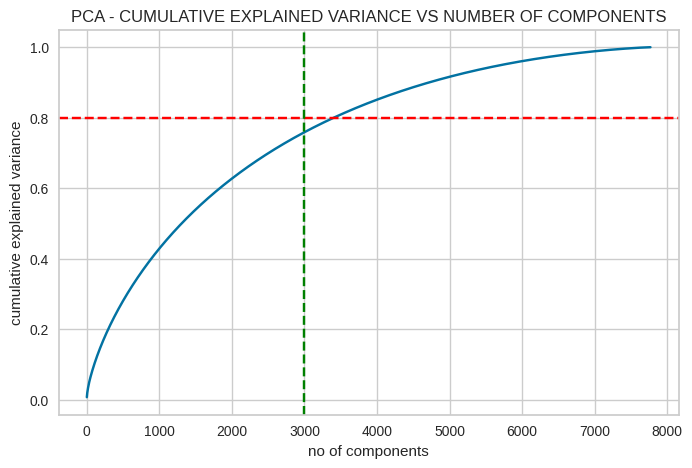

In [89]:
# Explained variance for different number of components
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - CUMULATIVE EXPLAINED VARIANCE VS NUMBER OF COMPONENTS')
plt.xlabel('no of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

* Approx 7500 components account for 100 percent of the variance.
* 3000 components alone account for more than 80% of the variance.
* Take top 3000 components to reduce dimensionality and simplify the model while still being able to capture more than 80% of the variance.

In [90]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(X)

PCA(n_components=3000, random_state=42)

In [91]:
# transformed features
X = pca.transform(X)

# shape of transformed vectors
X.shape

(7770, 3000)

## **7. Model Implementation**

### **7.1 K-Means Clustering**

K-means clustering is a popular unsupervised machine learning technique used to group similar data points together. The goal of k-means clustering is to partition a dataset into k clusters, where each cluster contains similar data points and is represented by its centroid.

The k-means algorithm works by first randomly selecting k centroids, one for each cluster. Then, it assigns each data point to the cluster whose centroid is closest to it. This process is repeated until the assignment of data points to clusters no longer changes, or until a maximum number of iterations is reached.

* We will determine the best number of clusters for the K-means clustering algorithm by visualizing the elbow curve and silhouette score.

**Elbow Curve Method**

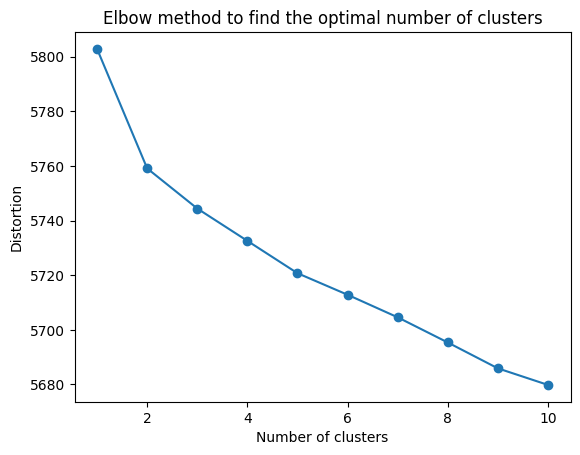

In [94]:
#Elbow method to find the optimal value of K

import numpy as np
import matplotlib.pyplot as plt

# Create a range of possible values for the number of clusters
num_clusters = range(1, 11)

# Calculate the distortion for each value of the number of clusters
distortions = []
for k in num_clusters:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  distortions.append(kmeans.inertia_)

# Plot the distortion for each value of the number of clusters
plt.plot(num_clusters, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow method to find the optimal number of clusters')
plt.show()


* The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.

**Silhouette Score Method**

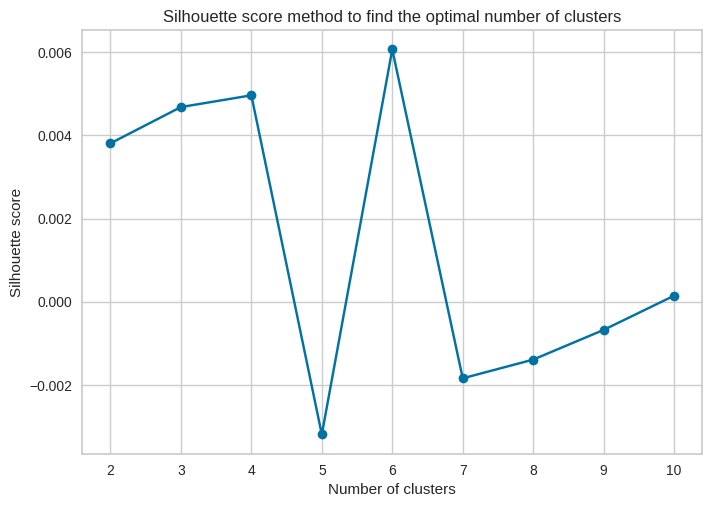

In [94]:
# Finding the optimal number of clusters using the Silhouette Score Method for the K-means clustering algorithm

# Import from KMeans algoritham and metric silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate the silhouette score for each value of the number of clusters
silhouette_scores = []
num_clusters = range(2, 11)
for k in num_clusters:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the silhouette score for each value of the number of clusters
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score method to find the optimal number of clusters')
plt.show()


* The highest Silhouette score is obtained for 6 clusters.
* 6 clusters to be build using the k-means clustering algorithm.

In [95]:
# Optimal number of cluster
silhouette_optimal_K=10
print(f'Optimal number of cluster using the Silhouette Score Method : {silhouette_optimal_K}')

Optimal number of cluster using the Silhouette Score Method : 10


In [105]:
# Training the K-means model on a dataset for number of clusters

# Import dependancy
from sklearn.cluster import KMeans

# Training the K-means model on the dataset
kmeans = KMeans(n_clusters=silhouette_optimal_K, random_state=42)
kmeans.fit(X)

# Predicting the cluster labels for each data point
y_pred = kmeans.predict(X)

In [97]:
# Centers of the clusters of the model
kmeans_centers=kmeans.cluster_centers_
kmeans_centers

array([[-3.48848988e-02, -5.26535111e-02,  2.65441569e-02, ...,
        -1.97674515e-05,  2.62605027e-04,  1.79402074e-04],
       [-3.69757642e-02, -5.36822265e-02,  9.32534870e-02, ...,
         1.39877986e-05, -5.10518556e-05, -1.96396862e-04],
       [-4.50814573e-02, -1.74017227e-02, -4.37271792e-02, ...,
         7.42457831e-06, -1.65843974e-04,  2.75619744e-05],
       ...,
       [-3.20907395e-02, -3.20082572e-02, -2.78973677e-02, ...,
        -1.24402369e-04, -3.84240885e-06, -1.46969041e-04],
       [ 1.45891099e-01,  6.66475668e-03,  3.31519770e-02, ...,
         9.39773165e-06, -2.90221833e-04, -2.98686793e-04],
       [ 1.41651594e-01, -5.20295530e-03,  7.06861661e-03, ...,
        -1.94039786e-05,  7.51747391e-05,  4.52343636e-05]])

In [98]:
# Inertia of the model
kmeans_inertia=kmeans.inertia_
kmeans_inertia

5681.89001431008

In [106]:
# Predict result
y_pred

array([9, 4, 4, ..., 1, 7, 1], dtype=int32)

In [109]:
# Evaluation of Model
Kmeans_eval=silhouette_score(X, y_pred)

In [114]:
# Clustering the data into 6 clusters

# Training the K-means model on a dataset for number of clusters

# Training the K-means model on the dataset
kmeans = KMeans(n_clusters=6, random_state=22)
kmeans.fit(X)

# Predicting the cluster labels for each data point
y_pred = kmeans.predict(X)
# Centers of the clusters of the model
kmeans_centers=kmeans.cluster_centers_
kmeans_centers
# Inertia of the model
kmeans_inertia=kmeans.inertia_
kmeans_inertia
# Predict result
y_pred
# Evaluation of Model
Kmeans_eval=silhouette_score(X, y_pred)
Kmeans_eval
kmeans_inertia

5712.261467688288

In [115]:
# Adding a kmeans cluster number attribute
netflix['cluster'] = y_pred


In [117]:
netflix.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'genres', 'description', 'cluster']]

type                               title        director  \
5812    Movie                           Stephanie  Akiva Goldsman   
2536    Movie  Greg Davies: You Magnificent Beast     Peter Orton   
4578  TV Show                        Office Girls                   
6670    Movie        The Minimalists: Less Is Now                   
3462  TV Show          Kulipari: An Army of Frogs                   

                                                   cast         country  \
5812               Shree Cooks, Frank Grillo, Anna Torv   United States   
2536                                        Greg Davies  United Kingdom   
4578  Roy Chiu, Alice Ko, Tia Lee, Patrick Lee, Kuo ...          Taiwan   
6670                                                      United States   
3462  Mark Hamill, Keith David, Wendie Malick, Josh ...   United States   

     rating                                             genres  \
5812      R                                      Horror Movies   
2536  TV-MA                                    Stand-Up Comedy   
4578  TV-14  International TV Shows, Romantic TV Shows, TV ...   
6670  TV-14                                      Documentaries   
3462  TV-Y7                                           Kids' TV   

                                            description  cluster  
5812  A menacing, unseen force stalks a young girl l...        0  
2536  British comedian Greg Davies revisits terrifyi...        2  
4578  A department store mogul has his son work inco...        5  
6670  They've built a movement out of minimalism. Lo...        2  
3462  In a tale of bravery and heroism, fearless fro...        0

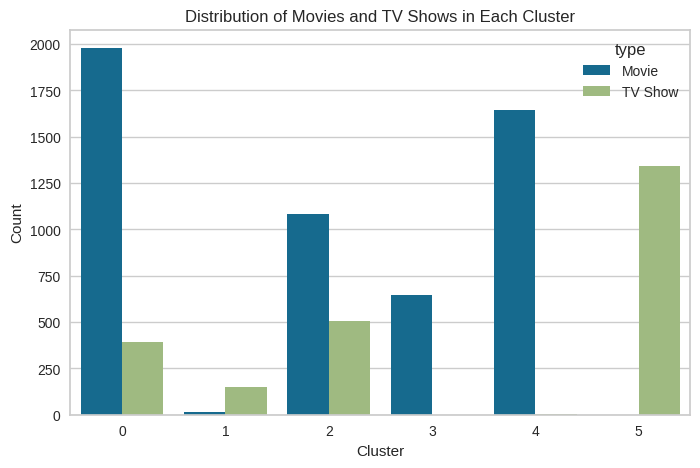

In [123]:
# prompt: plotting countplot for Number of movies vs tv shows in each cluster

plt.figure(figsize=(8,5))
sns.countplot(x='cluster', hue='type', data=netflix)
plt.title('Distribution of Movies and TV Shows in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


* **Successfully built 6 clusters using the k-means clustering algorithm.**

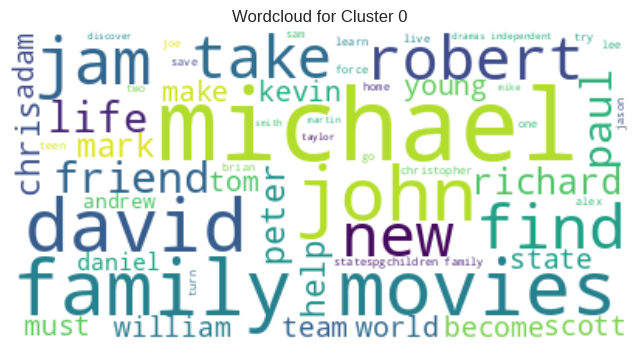

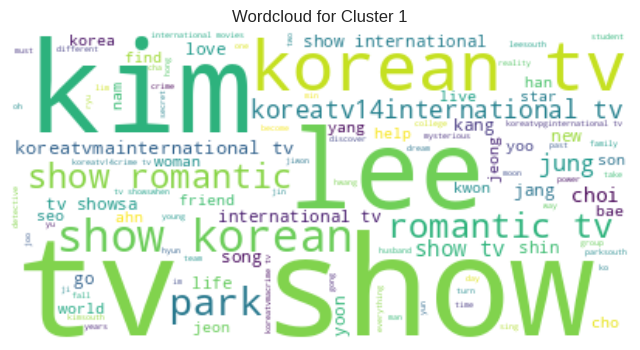

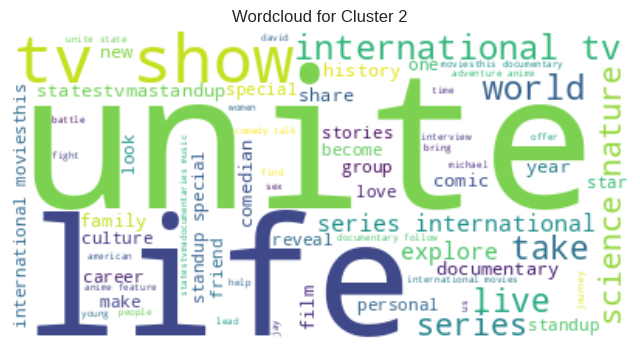

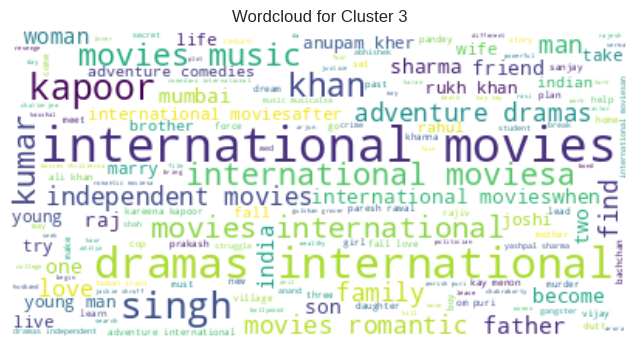

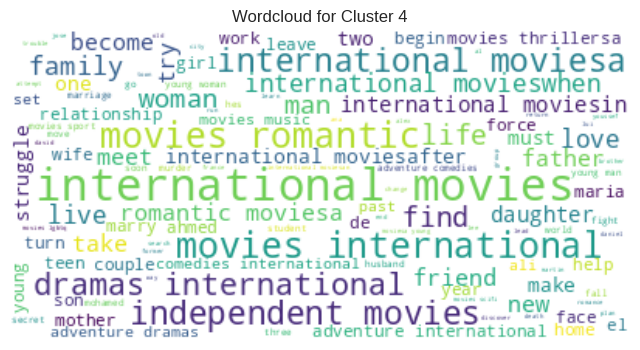

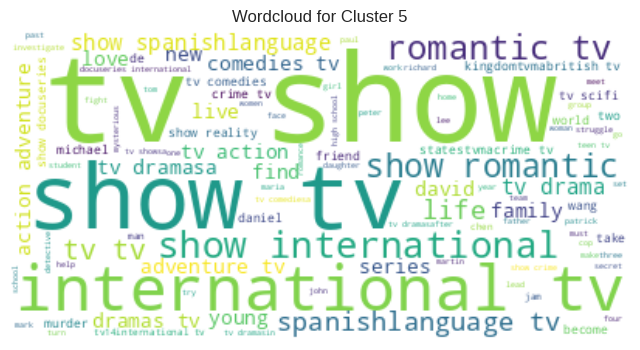

In [132]:
# Building wordclouds for different clusters in K-Means Clustering
import re
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Creating wordclouds for each cluster
for cluster in range(6):
  # Get all the data points for the current cluster
  cluster_data = netflix[netflix['cluster'] == cluster]
  # Get the text data from the current cluster
  cluster_text = cluster_data['text_data']
  cluster_data['text_data'] = cluster_data['text_data'].astype(str)
  cluster_text = ' '.join(cluster_data['text_data'].tolist())
  cluster_text = re.sub(r'[^\w\s]+|\n', '', cluster_text)
  # Create a word cloud for the current cluster
  wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate( cluster_text)
  # Plot the word cloud
  plt.figure(figsize=(8, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Wordcloud for Cluster {cluster}')
  plt.show()


#### **Building wordclouds for different clusters in K-Means Clustering**

In [135]:
def kmeans_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  netflix_df_wordcloud = netflix[['cluster',column_name]].dropna()
  netflix_df_wordcloud = netflix_df_wordcloud[netflix_df_wordcloud['cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in netflix_df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Word Cloud on "description" column for different cluster**

cluster 0


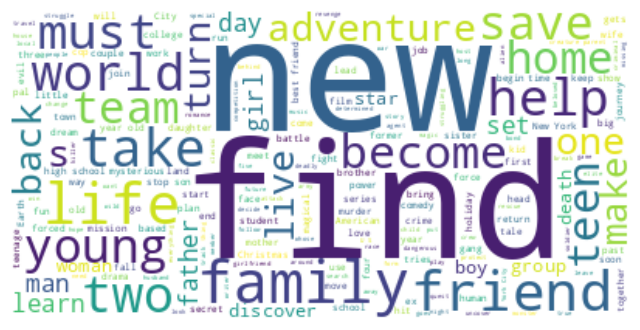

cluster 1


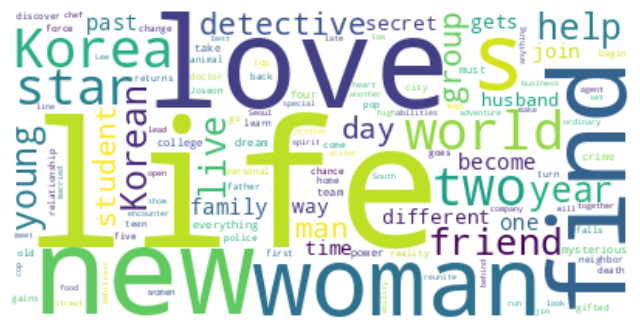

cluster 2


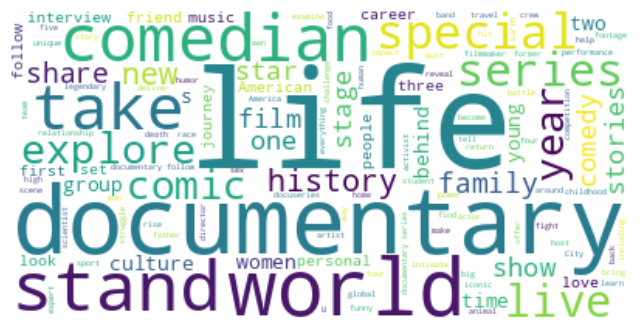

cluster 3


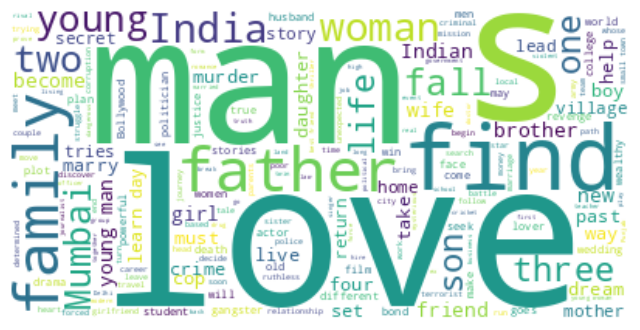

cluster 4


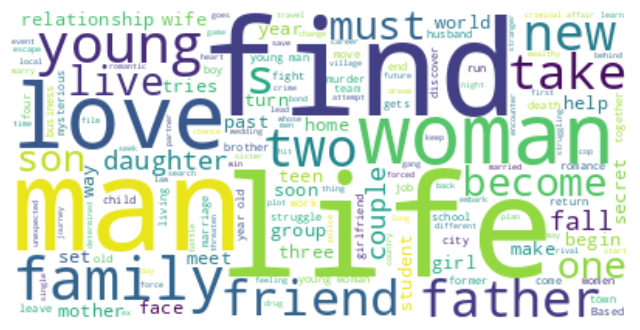

cluster 5


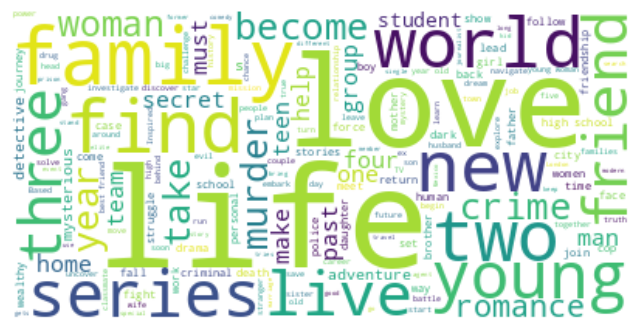

In [136]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'description')

**Word Cloud on "cast" column for different cluster**

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'cast')

**Word Cloud on "director" column for different cluster**

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'director')

**Word Cloud on "listed_in" (genre) col for different cluster**

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'listed_in')

**Word Cloud on "country" column column for different cluster**

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'country')

**Word Cloud on "title" column column for different cluster**

cluster 0


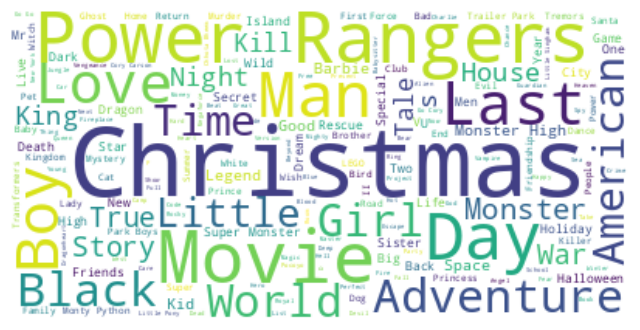

cluster 1


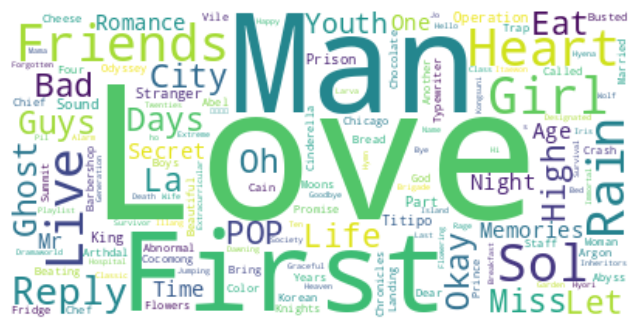

cluster 2


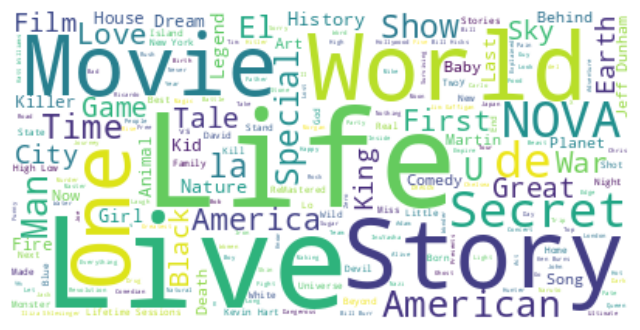

cluster 3


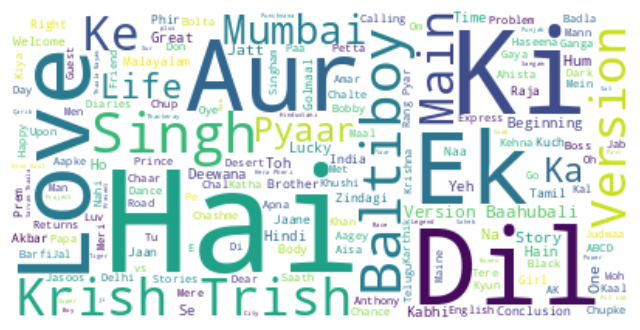

cluster 4


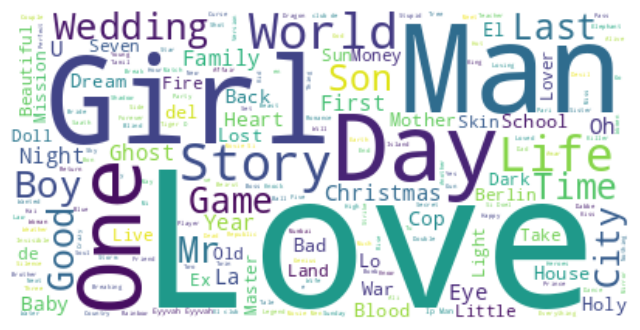

cluster 5


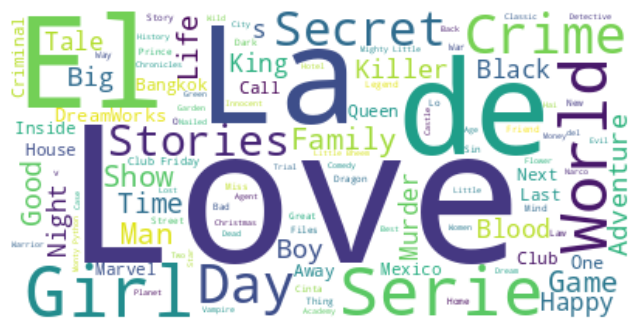

In [137]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'title')

### **7.2 Hierarchical clustering**

Hierarchical clustering is a method of clustering data points into a tree-like structure. It is an alternative method to k-means clustering and it is used to group similar data points together in a hierarchical fashion.

There are two main types of Hierarchical clustering: Agglomerative and Divisive. Agglomerative is a bottom-up approach where each data point is considered as a separate cluster and the algorithm iteratively merges the closest clusters. On the other hand, Divisive is a top-down approach where all data points are considered as a single cluster and the algorithm iteratively splits the clusters.

The hierarchical clustering algorithm can be represented by a dendrogram which makes it easy to visualize the structure of the clusters.

**Dendogram Method**

In [ ]:
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 5))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

**At a distance of 4 units, 7 clusters can be built using the agglomerative clustering algorithm.**

Building 7 clusters using the Agglomerative clustering algorithm:

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(X)

In [ ]:
# Adding a hierarchical cluster number attribute
netflix['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
netflix.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

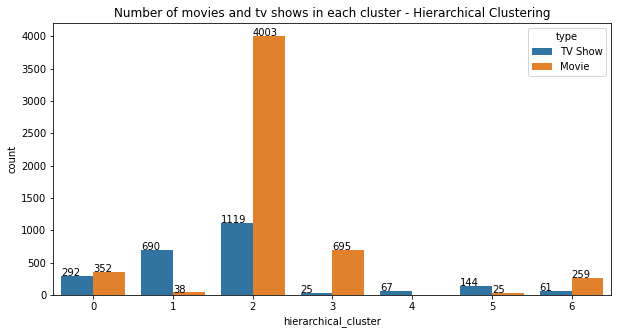

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=netflix_df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm.

#### **Building wordclouds for different clusters in hierarchical Clustering**

In [ ]:
def hierarchical_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  netflix_df_wordcloud = netflix[['hierarchical_cluster',column_name]].dropna()
  netflix_df_wordcloud = netflix_df_wordcloud[netflix_df_wordcloud['hierarchical_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in netflix_df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Word Cloud on "title" column for different cluster**

cluster 0


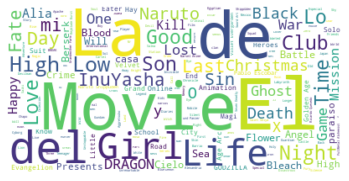

cluster 1


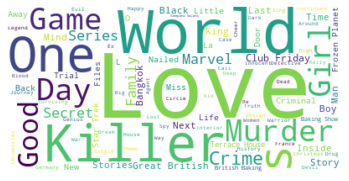

cluster 2


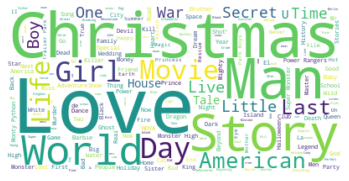

cluster 3


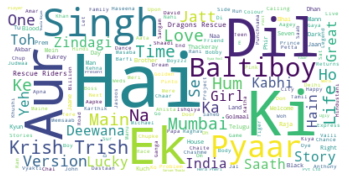

cluster 4


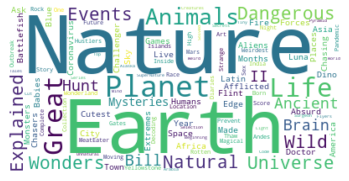

cluster 5


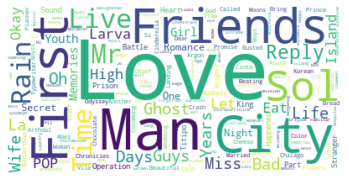

cluster 6


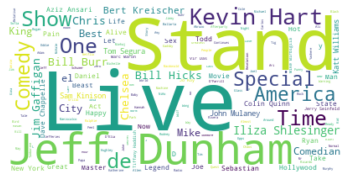

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'title')

**Word Cloud on "description" column for different cluster**

cluster 0


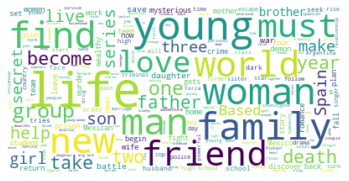

cluster 1


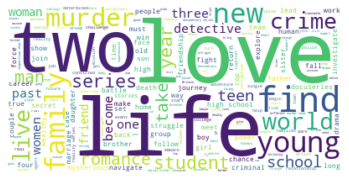

cluster 2


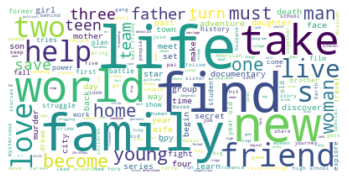

cluster 3


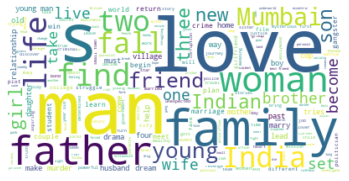

cluster 4


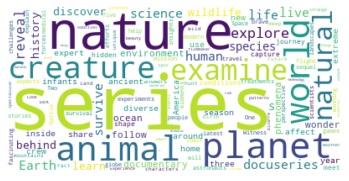

cluster 5


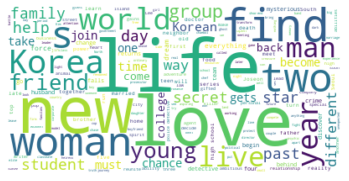

cluster 6


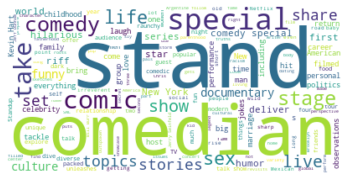

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'description')

**Word Cloud on "cast" column for different cluster**

cluster 0


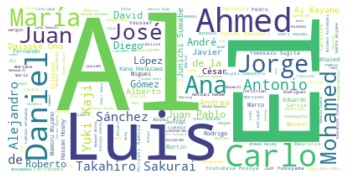

cluster 1


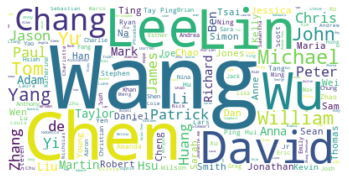

cluster 2


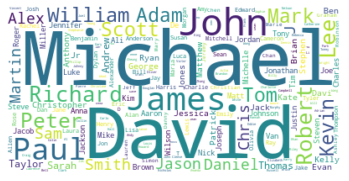

cluster 3


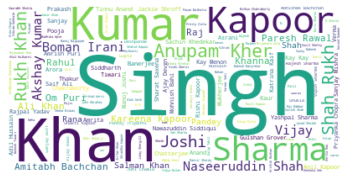

cluster 4


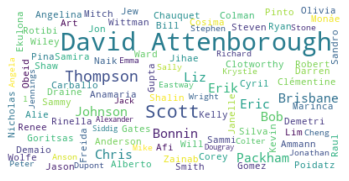

cluster 5


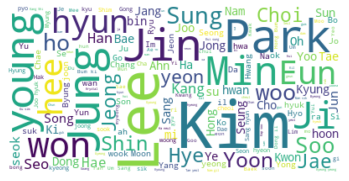

cluster 6


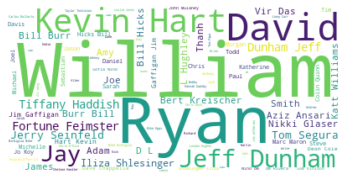

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'cast')

**Word Cloud on "country" column for different cluster**

cluster 0


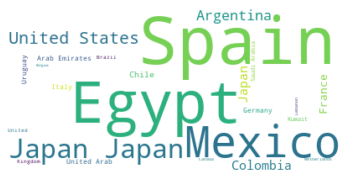

cluster 1


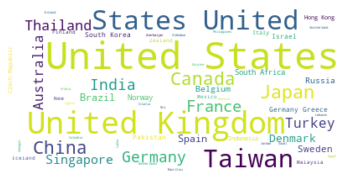

cluster 2


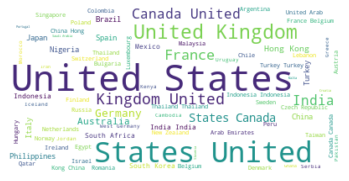

cluster 3


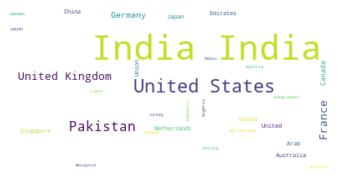

cluster 4


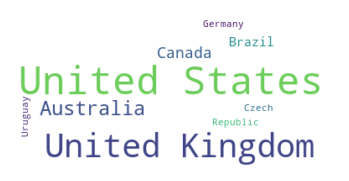

cluster 5


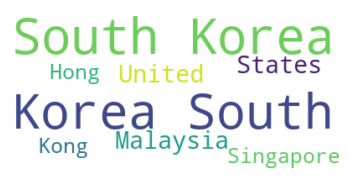

cluster 6


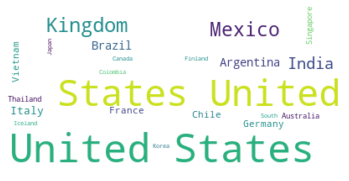

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'country')

**Word Cloud on "listed_in (genre)" column for different cluster**

cluster 0


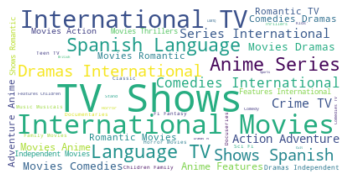

cluster 1


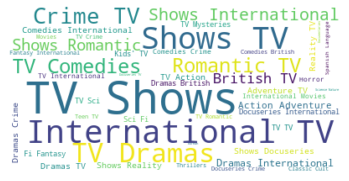

cluster 2


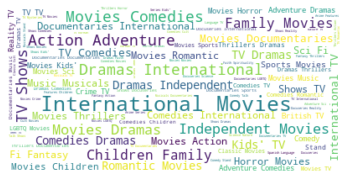

cluster 3


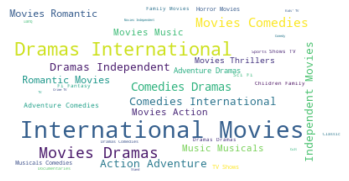

cluster 4


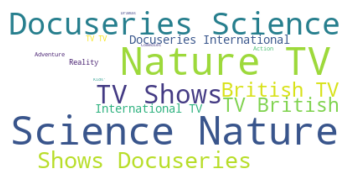

cluster 5


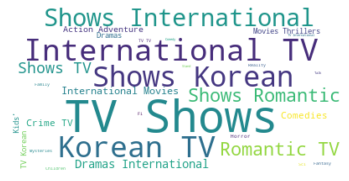

cluster 6


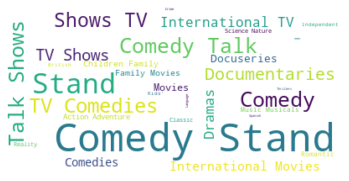

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'listed_in')

#### **7.3 DBSCAN Clustering**

In [ ]:
## Training the DBSCAN model on a dataset

# Import dependancy
from sklearn.cluster import DBSCAN
# Fitting model
dbscan = DBSCAN(eps=0.0375, min_samples=3)
dbscan.fit(X)

In [ ]:
# Predict result
y_predict = dbscan.labels_
y_predict

In [ ]:
### Evaluation of DBSCAN model
## Function to evaluate and visualize evaluation metrics of the DBSCAN model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def dbscan_clustering_eval(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)

    # Data
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')

    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)

    return {'Num_clusters':len(set(y_predict)),'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

In [ ]:
## Assigne Movies and TV Shows to its cluster

# Copy dataset
dbscan_df=netflix.copy()

# Droping non original features from dataset
dbscan_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
dbscan_df['cluster'] = dbscan.labels_
dbscan_df.head()

In [ ]:
## Finding number of Movies / TV Shows assigned to each cluster

# Create dataframe for  number of movies/Tv shows in each cluster
num_datapoint_in_clusters=dbscan_df['cluster'].value_counts().reset_index()

# Plotting bar plot
plt.figure(figsize=(8,5))
ax=sns.barplot(x=num_datapoint_in_clusters['index'],y=num_datapoint_in_clusters['cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Number of Movies / TV Shows assigned to each cluster using DBSCAN model")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows")

**Comparing Different Models based on the Evaluation Metrics**

In [ ]:
## Creating dataframe of performance metrics of all builded models

# Data
model=['K-Means Clustering','Hierarchical Clustering','DBSCAN Clustering']
silhouette_score=[Kmeans_eval['silhouette'],hc_eval['silhouette'],dbscan_eval['silhouette']]
calinski_harabasz_score=[Kmeans_eval['ch_score'],hc_eval['ch_score'],dbscan_eval['ch_score']]
davies_bouldin_score=[Kmeans_eval['db_score'],hc_eval['db_score'],dbscan_eval['db_score']]

# Create a dataframe
models_evaluation_df = pd.DataFrame({'model': model, 'silhouette_score': silhouette_score,
                                     'calinski_harabasz_score': calinski_harabasz_score,
                                     'davies_bouldin_score':davies_bouldin_score})
# Dataframe
models_evaluation_df

## **9. Conclusion**

In this project, we tackled a text clustering problem in which we had to categorize and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are not.

* There were approximately 7787 records and 11 attributes in the dataset.
* We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).
* It was discovered that Netflix hosts more movies than television shows on its platform, and the total number of shows added to Netflix is expanding at an exponential rate. Additionally, most of the shows were made in the United States.
* The attributes were chosen as the basis for the **clustering of the data: cast, country, genre, director, rating, and description** The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.
* **10000 attributes** in total were created by **TFIDF vectorization**.
The problem of dimensionality was dealt with through the **use of Principal Component Analysis (PCA). Because 3000 components were able to account for more than 80% of the variance**, the total number of components was limited to 3000.
* Utilizing the **K-Means Clustering algorithm**, we first constructed clusters, and the **optimal number of clusters was determined to be 6**. The **elbow method and Silhouette score analysis** were used to get this.
* The **Agglomerative clustering algorithm** was then used to create clusters, and the **optimal number of clusters was determined to be 7**. This was obtained after visualizing the **dendrogram**.
* The similarity matrix generated by applying **cosine similarity** was used to construct a **content-based recommender system**. The user will receive ten recommendations from this recommender system based on the type of show they watched.

## **Hurrah! We have successfully completed Machine Learning Capstone Project !!!**